# Importing the Libraries 

In [224]:
import pandas as pd        
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
import matplotlib.pyplot as plt
# Setting up pandas display to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Getting the Data

In [225]:
# Storing the csv file as pandas dataframe
df = pd.read_csv("loan.csv",low_memory= False) 
# Getting the top 10 rows of the dataframe
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Understanding and Cleaning the Data

In [226]:
# Getting number of total rows and columns in data
print(df.shape)
print(df.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [227]:
# Getting all the columns in the data
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [228]:
# Getting number of unique values in each of the columns of data
df.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [229]:
# Getting % of null values in each of the columns of data
df_null =pd.DataFrame((df.isnull().sum()/df.shape[0])*100).reset_index()
df_null.columns = ['Columns', '% Null Values']
df_null

,Columns,% Null Values
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
5,term,0.000000
6,int_rate,0.000000
7,installment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


<AxesSubplot:ylabel='Count'>

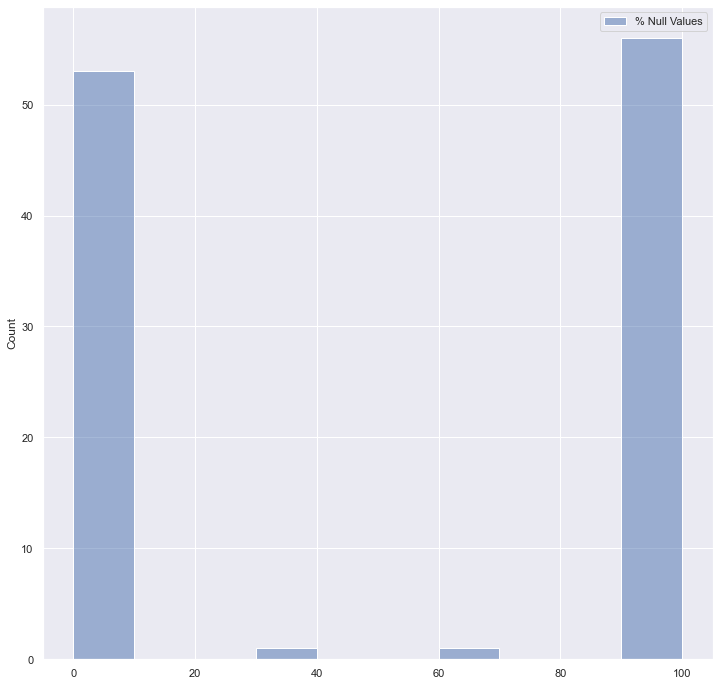

In [230]:
# Plotting histogram for number of columns vs % null values in the column
sns.histplot(data=df_null,bins= 10, legend = True)

##### From the histogram for % null values in a column we can see that columns have ether <70% null values or >=90% null values hence we can drop the columns having greater than 70% null values

In [231]:
# Identifying columns having greater than 70% null values
df_null_70 = df_null[df_null['% Null Values']>70]
df_null_70

,Columns,% Null Values
29,mths_since_last_record,92.985372
47,next_pymnt_d,97.129693
50,mths_since_last_major_derog,100.000000
53,annual_inc_joint,100.000000
54,dti_joint,100.000000
55,verification_status_joint,100.000000
57,tot_coll_amt,100.000000
58,tot_cur_bal,100.000000
59,open_acc_6m,100.000000
60,open_il_6m,100.000000


In [232]:
# Dropping cloumns from data which have >70% null values
for i in df_null_70['Columns']:
    df= df.drop([i], axis = 1)

In [233]:
# Removing 'url','desc' and 'policy_code' columns since they are not relevant in the analysis
print(df.shape)
df=df.drop(['url','desc','policy_code'], axis = 1)
print(df.shape)


(39717, 55)
(39717, 52)


In [234]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,11,0,5210,32.60%,13,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,2,0,9279,36.50%,3,f,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [235]:
# Dropping customer behavior varibales since these are not present at the time of loan application
print(df.shape)
df=df.drop(['application_type','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','total_acc','revol_util','revol_bal','pub_rec','open_acc','inq_last_6mths','earliest_cr_line','delinq_2yrs'], axis = 1)
print(df.shape)

(39717, 52)
(39717, 31)


In [236]:
# Indentifying columns still having null values
df_null ={"Columns": df.columns,'% Null values':(df.isnull().sum()/df.shape[0])*100,'# Null values':df.isnull().sum()}

pd.DataFrame(df_null).sort_values('# Null values', ascending = False)

,Columns,% Null values,# Null values
mths_since_last_delinq,mths_since_last_delinq,64.662487,25682
emp_title,emp_title,6.191303,2459
emp_length,emp_length,2.706650,1075
pub_rec_bankruptcies,pub_rec_bankruptcies,1.754916,697
chargeoff_within_12_mths,chargeoff_within_12_mths,0.140998,56
collections_12_mths_ex_med,collections_12_mths_ex_med,0.140998,56
tax_liens,tax_liens,0.098195,39
title,title,0.027696,11
pymnt_plan,pymnt_plan,0.000000,0
delinq_amnt,delinq_amnt,0.000000,0


###### Checking unique values present in the columns with null values and distribution of the values in the column
    # 1st Column  = mths_since_last_delinq

[ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]
AxesSubplot(0.125,0.125;0.775x0.755)


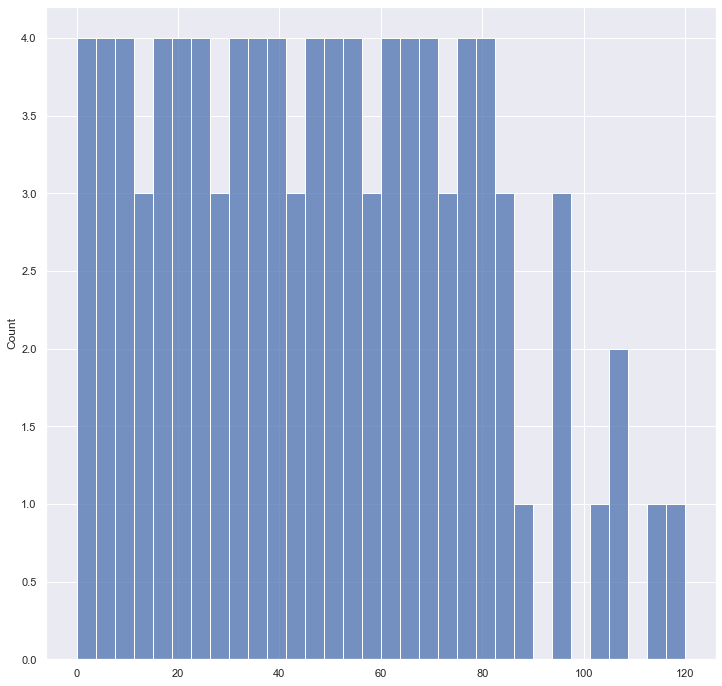

In [237]:
print(df['mths_since_last_delinq'].unique())
print(sns.histplot(data=df['mths_since_last_delinq'].unique(), bins = 32))

In [238]:
# Since 'mths_since_last_delinq' is a numerical variable and the distribution is not highly skewed we can replace null values with median
df['mths_since_last_delinq']=df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())
print(df['mths_since_last_delinq'].unique())


[ 34.  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.  86.
 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]


    # 2nd Column  = emp_title

In [239]:
print(df['emp_title'].unique())

# Since this is a categorical varibale we are substituting nulls with ''
df['emp_title'] = df['emp_title'].fillna('')


[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']


    # 3rd Column = emp_length

In [240]:
print(df['emp_length'].unique())

# Since this is a categorical varibale we are substituting null with ''
df['emp_length'] = df['emp_length'].fillna('')



['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


    # 4th Column = pub_rec_bankruptcies

In [241]:
print(df['pub_rec_bankruptcies'].unique())

# Since this is the number of public recoded bankruptcies and the range is 0 to 2 we should not substitue the null values with statsitcal values and should keep it as ''
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna('')


[ 0.  1.  2. nan]


    # 5th Column = chargeoff_within_12_mths

In [242]:
print(df['chargeoff_within_12_mths'].unique())

# Since here most of the columns are already 0 we should replace nulls with ''
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

[ 0. nan]


    # 6th Column = collections_12_mths_ex_med

In [243]:
print(df['collections_12_mths_ex_med'].unique())

# Since here most of the columns are already 0 we should replace nulls with ''
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

[ 0. nan]


    # 7th Column = tax_liens

In [244]:
print(df['tax_liens'].unique())
# Since here most of the columns are already 0 we should replace nulls with ''
df['tax_liens'] = df['tax_liens'].fillna(0)

[ 0. nan]


    # 7th Column = title

In [245]:
print(pd.DataFrame((df['title'].value_counts())))
# Since this is a categorical variable replacing null with ''
df['title'] = df['title'].fillna('')

                                                    title
Debt Consolidation                                   2184
Debt Consolidation Loan                              1729
Personal Loan                                         659
Consolidation                                         517
debt consolidation                                    505
Home Improvement                                      356
Credit Card Consolidation                             356
Debt consolidation                                    334
Small Business Loan                                   328
Credit Card Loan                                      317
Personal                                              308
Consolidation Loan                                    255
Home Improvement Loan                                 247
personal loan                                         234
personal                                              220
Loan                                                  213
Wedding Loan  

In [246]:
# Checking Columns with null values. should be zero now
df_null_2 ={"Columns": df.columns,'% Null values':(df.isnull().sum()/df.shape[0])*100,'# Null values':df.isnull().sum()}

pd.DataFrame(df_null_2).sort_values('# Null values', ascending = False)

,Columns,% Null values,# Null values
id,id,0.0,0
loan_status,loan_status,0.0,0
pub_rec_bankruptcies,pub_rec_bankruptcies,0.0,0
delinq_amnt,delinq_amnt,0.0,0
chargeoff_within_12_mths,chargeoff_within_12_mths,0.0,0
acc_now_delinq,acc_now_delinq,0.0,0
collections_12_mths_ex_med,collections_12_mths_ex_med,0.0,0
initial_list_status,initial_list_status,0.0,0
mths_since_last_delinq,mths_since_last_delinq,0.0,0
dti,dti,0.0,0


In [247]:
# Creating a dataframe to identify columns with only one values in it

df_unique = {} 

for i in df.columns:
        df_unique[i] = [len(df[i].unique())]

df_unique = pd.DataFrame(df_unique).T.reset_index()
df_unique.columns = ['Columns', 'Count']


In [248]:
df_unique

,Columns,Count
0,id,39717
1,member_id,39717
2,loan_amnt,885
3,funded_amnt,1041
4,funded_amnt_inv,8205
5,term,2
6,int_rate,371
7,installment,15383
8,grade,7
9,sub_grade,35


In [249]:
# Drop columns which have only one value
for i in df_unique[df_unique['Count']==1]['Columns']:
    df= df.drop([i], axis = 1)

In [250]:
# Removing rows where the loan is currently on-going and making binary variable for loan status
print(df.shape)
df = df[df['loan_status'] != 'Current']
print(df.shape)

(39717, 24)
(38577, 24)


In [251]:
df ['Loan_Status_Binary'] = [0 if a == 'Fully Paid' else 1 for a in df['loan_status']]

# Univariate Analysis

## Finding Correlation in data

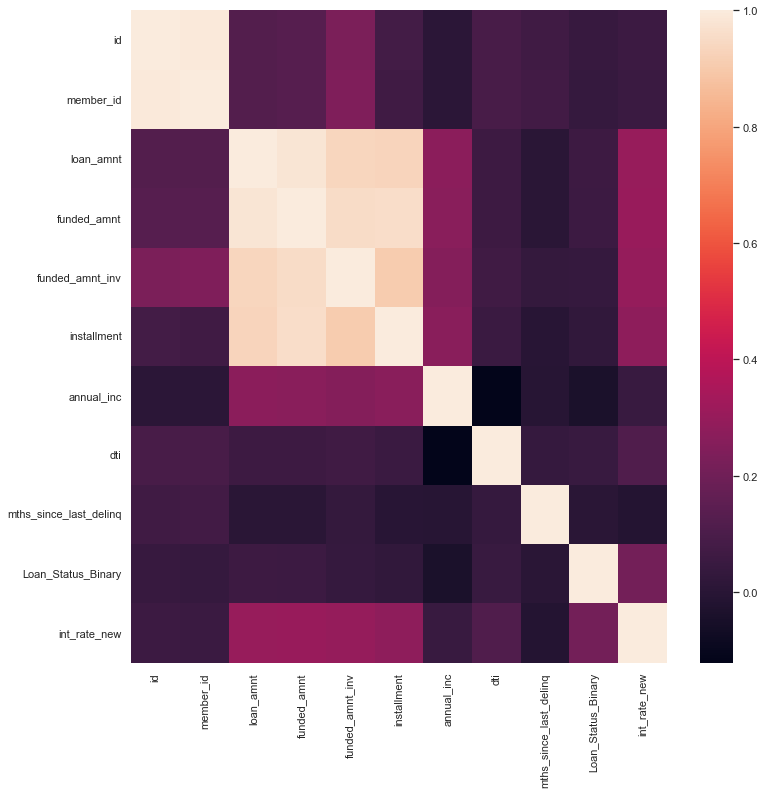

In [470]:
sns.heatmap(data = df.corr())
plt.show()
# From the correlation matrics we can see that loan amount(loan_amnt),amount commited by investor for fund(funded_amnt_inv), amount funded currently(funded_amnt) and installments(installment) are all correlated   

## Univariate Analysis Analysis for categorical variable 

<AxesSubplot:xlabel='Default percent', ylabel='term'>

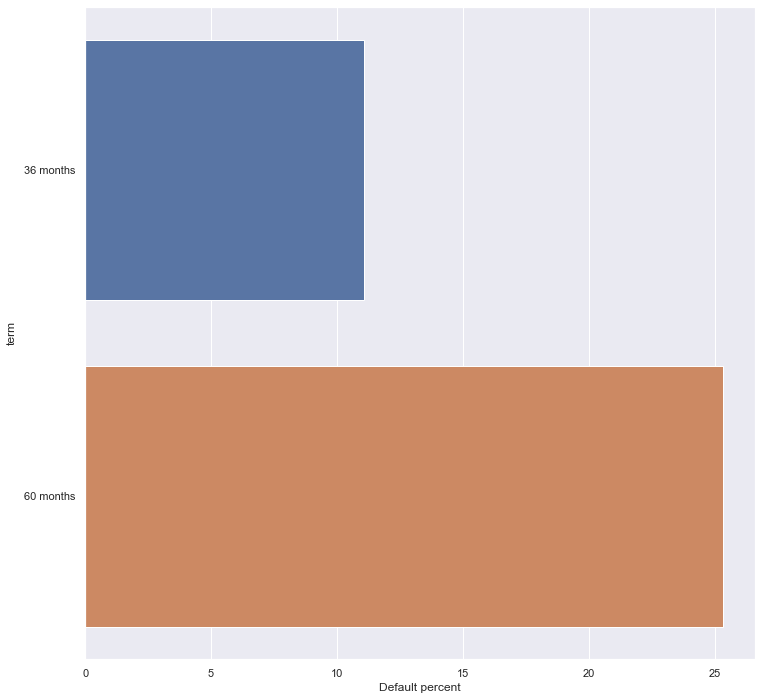

In [471]:
# Understanding the default rate for each "term" in data

df_uni = df[['term', 'Loan_Status_Binary']].groupby(by ='term').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['term'])['term'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['term', 'Default percent']], y = 'term', x = 'Default percent')

<AxesSubplot:xlabel='grade', ylabel='Default percent'>

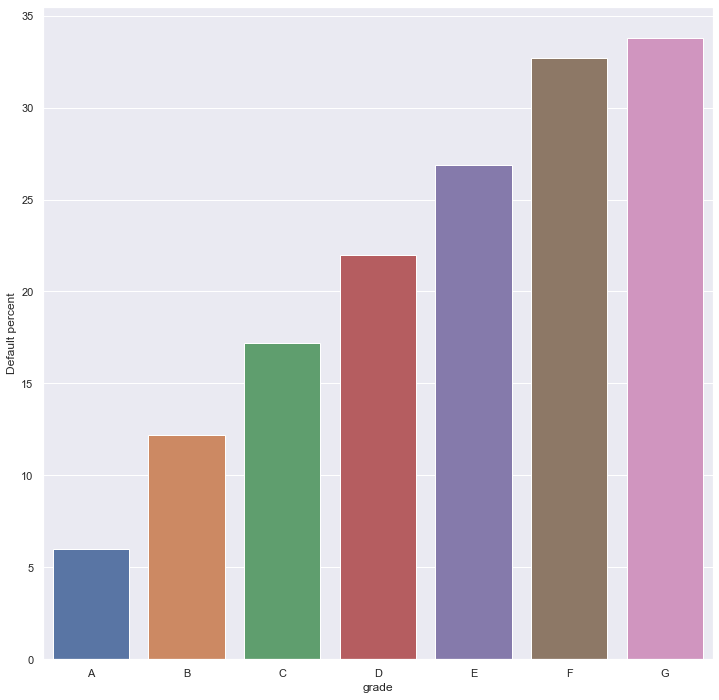

In [459]:
# Understanding the default rate for each "grade" in data

df_uni = df[['grade', 'Loan_Status_Binary']].groupby(by ='grade').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['grade'])['grade'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['grade', 'Default percent']], x = 'grade', y = 'Default percent')

<AxesSubplot:xlabel='sub_grade', ylabel='Default percent'>

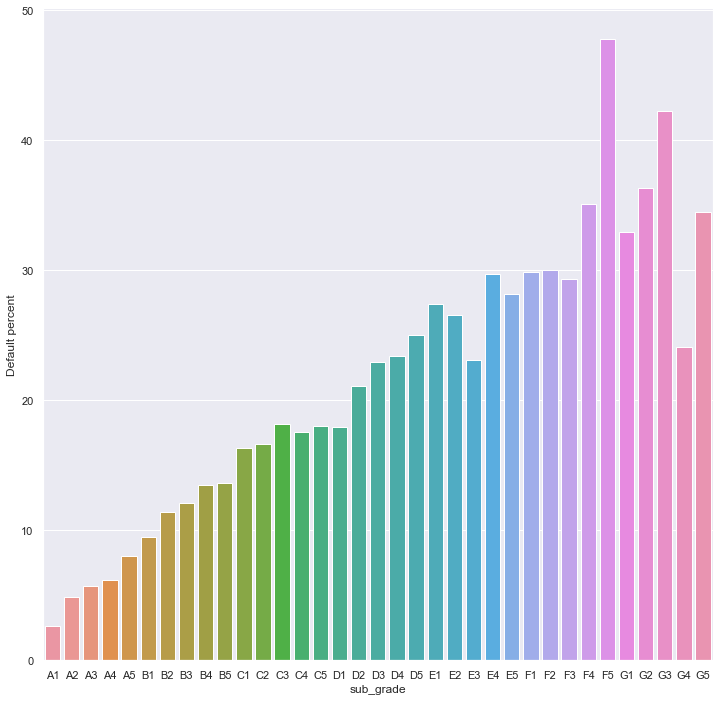

In [460]:
# Understanding the default rate for each "sub_grade" in data

df_uni = df[['sub_grade', 'Loan_Status_Binary']].groupby(by ='sub_grade').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['sub_grade'])['sub_grade'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['sub_grade', 'Default percent']], x = 'sub_grade', y = 'Default percent')

<AxesSubplot:xlabel='emp_length', ylabel='Default percent'>

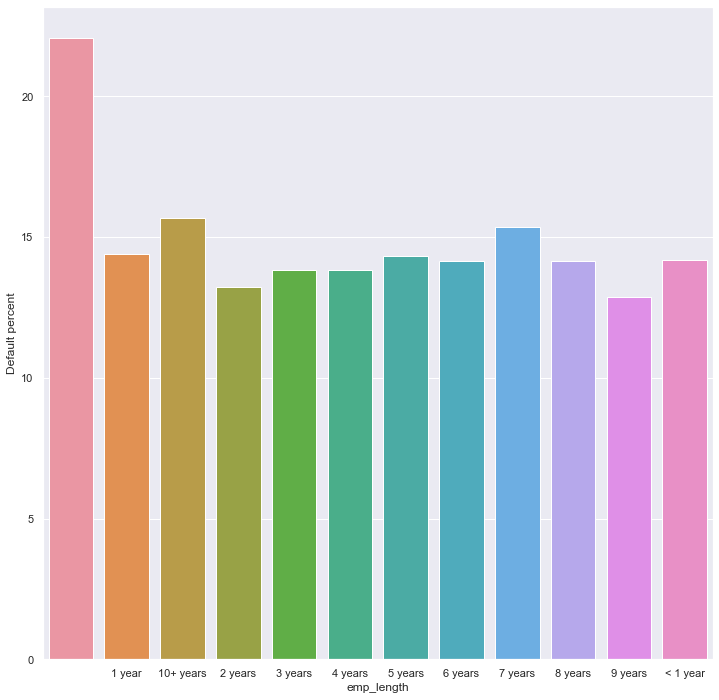

In [461]:
# Understanding the default rate for each "emp_length" in data

df_uni = df[['emp_length', 'Loan_Status_Binary']].groupby(by ='emp_length').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['emp_length'])['emp_length'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['emp_length', 'Default percent']], x = 'emp_length', y = 'Default percent')

<AxesSubplot:xlabel='home_ownership', ylabel='Default percent'>

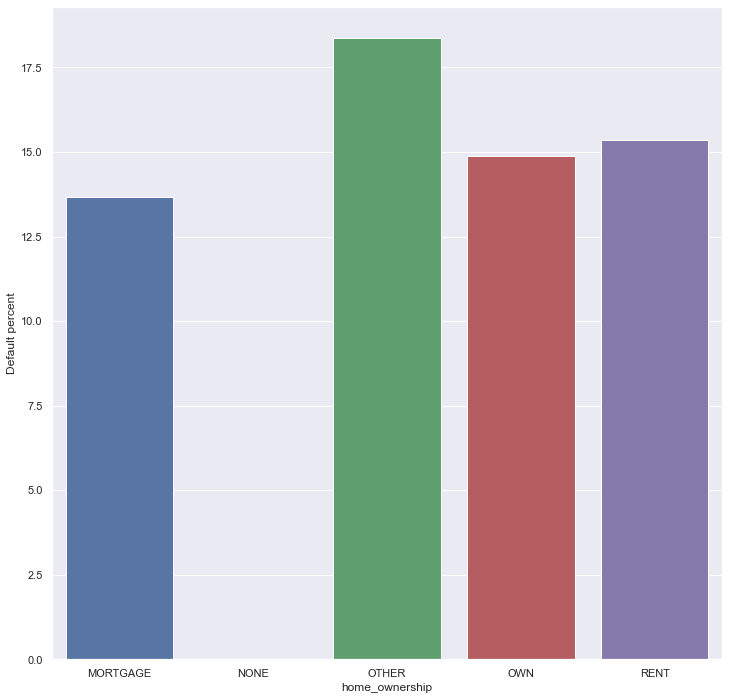

In [462]:
# Understanding the default rate for each "home_ownership" in data

df_uni = df[['home_ownership', 'Loan_Status_Binary']].groupby(by ='home_ownership').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['home_ownership'])['home_ownership'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['home_ownership', 'Default percent']], x = 'home_ownership', y = 'Default percent')

<AxesSubplot:xlabel='verification_status', ylabel='Default percent'>

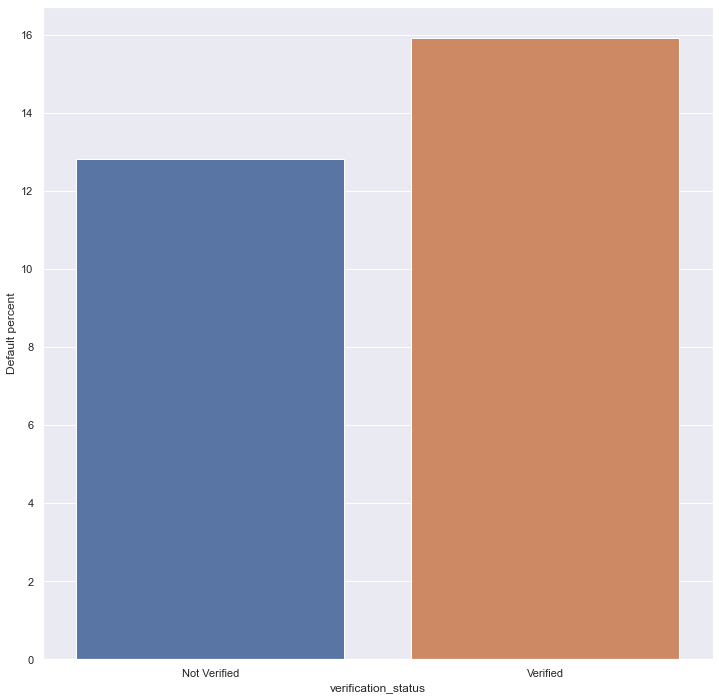

In [463]:
# Replacing 'Source Verified' with 'Verified' since both are same thing
df['verification_status']= df['verification_status'].replace(to_replace = 'Source Verified', value = 'Verified')

# Understanding the default rate for each "verification_status" in data

df_uni = df[['verification_status', 'Loan_Status_Binary']].groupby(by ='verification_status').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['verification_status'])['verification_status'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['verification_status', 'Default percent']], x = 'verification_status', y = 'Default percent')


<AxesSubplot:xlabel='Default percent', ylabel='issue_d'>

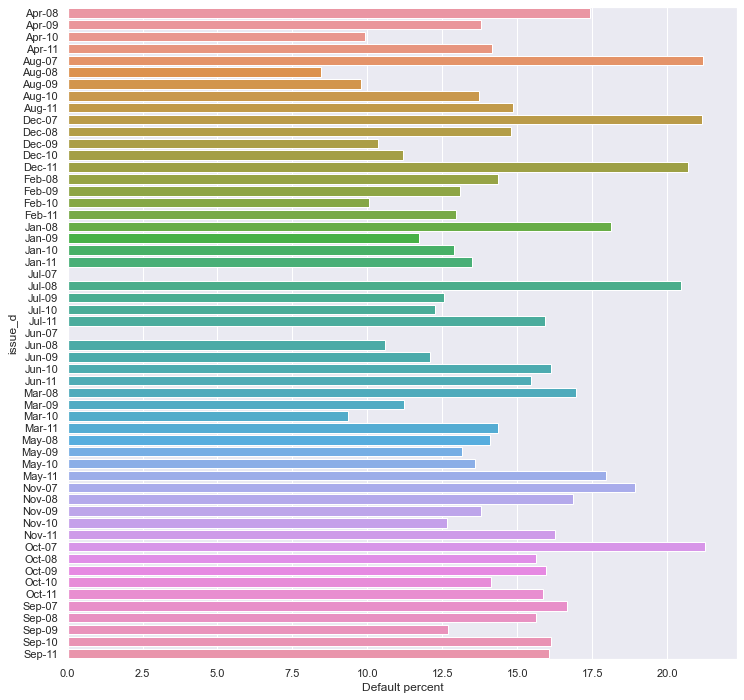

In [395]:
# Understanding the default rate for each "issue_d" in data

df_uni = df[['issue_d', 'Loan_Status_Binary']].groupby(by ='issue_d').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['issue_d'])['issue_d'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['issue_d', 'Default percent']], y = 'issue_d', x = 'Default percent')


<AxesSubplot:xlabel='Default percent', ylabel='Issue_mth'>

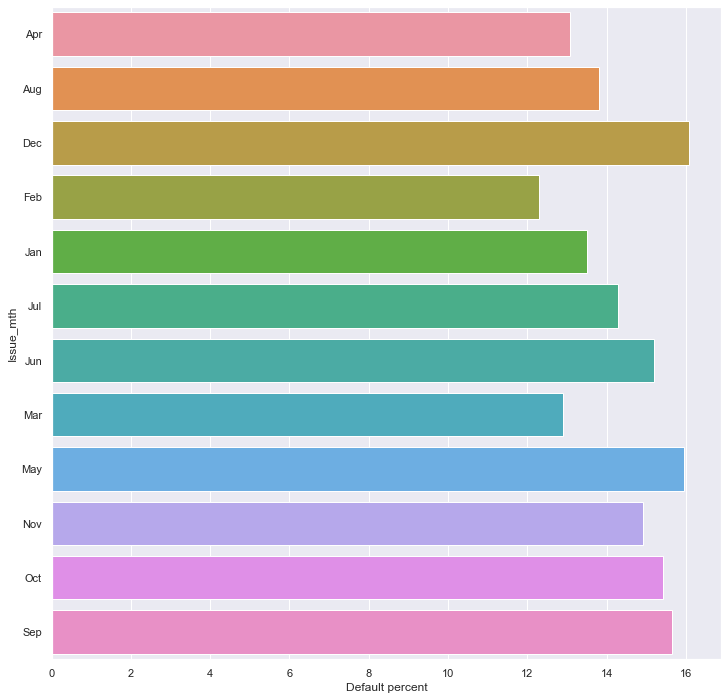

In [413]:
# Creating columns for monthly to understand month level insights
df['Issue_mth'] = df['issue_d'].str[:3]

# Understanding the default rate for each "Issue_mth" in data

df_uni = df[['Issue_mth', 'Loan_Status_Binary']].groupby(by ='Issue_mth').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['Issue_mth'])['Issue_mth'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['Issue_mth', 'Default percent']], y = 'Issue_mth', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='Issue_yr'>

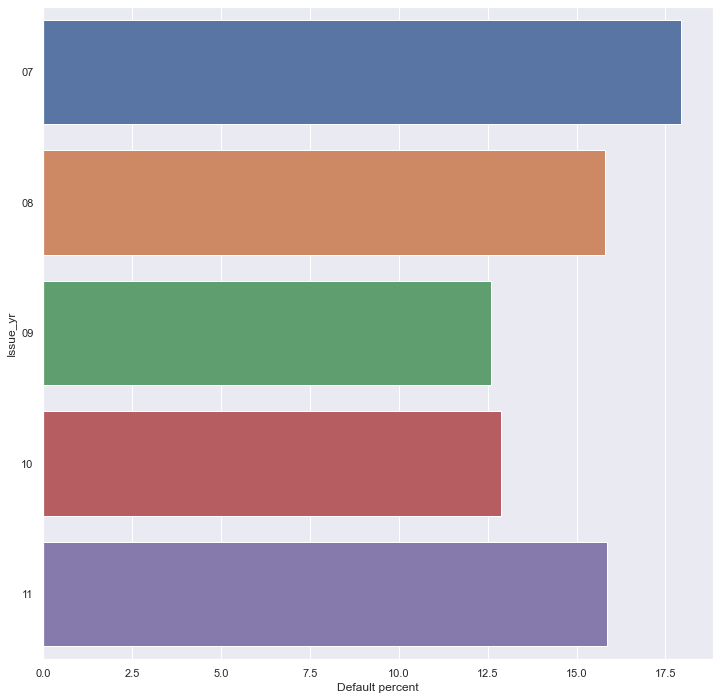

In [399]:
# Creating columns foryr to understand month level insights
df['Issue_yr'] = df['issue_d'].str[4:]

# Understanding the default rate for each "Issue_yr" in data

df_uni = df[['Issue_yr', 'Loan_Status_Binary']].groupby(by ='Issue_yr').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['Issue_yr'])['Issue_yr'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['Issue_yr', 'Default percent']], y = 'Issue_yr', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='purpose'>

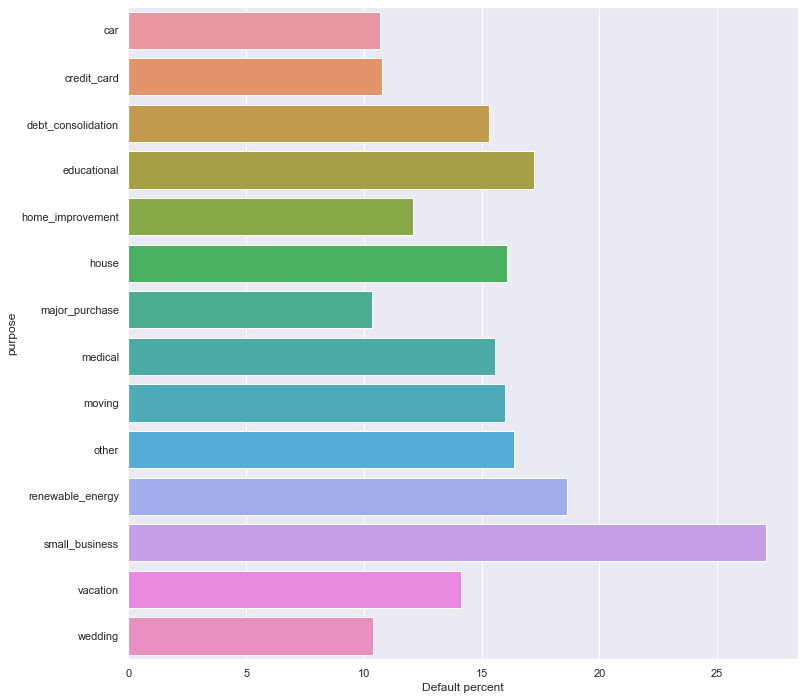

In [414]:
# Understanding the default rate for each "purpose" in data

df_uni = df[['purpose', 'Loan_Status_Binary']].groupby(by ='purpose').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['purpose'])['purpose'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['purpose', 'Default percent']], y = 'purpose', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='addr_state'>

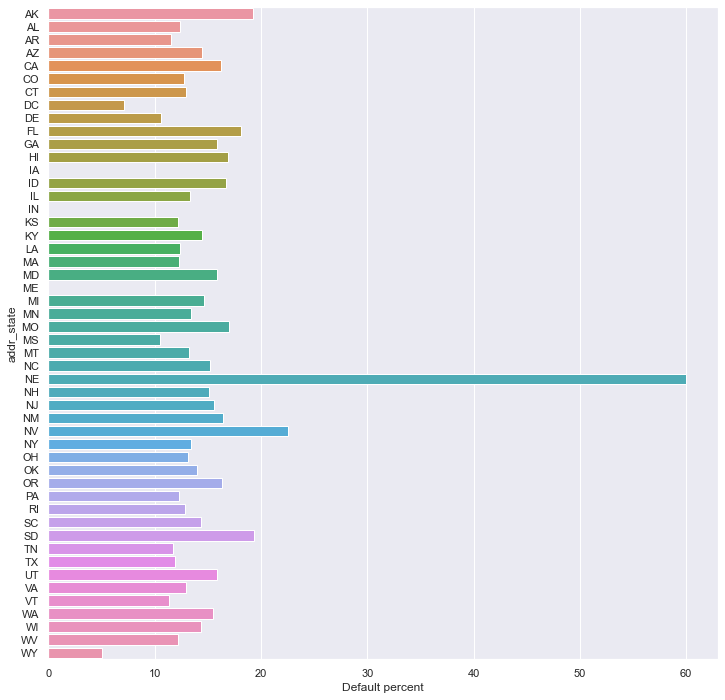

In [465]:
# Understanding the default rate for each "purpose" in data

df_uni = df[['addr_state', 'Loan_Status_Binary']].groupby(by ='addr_state').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['addr_state'])['addr_state'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['addr_state', 'Default percent']], y = 'addr_state', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='pub_rec_bankruptcies'>

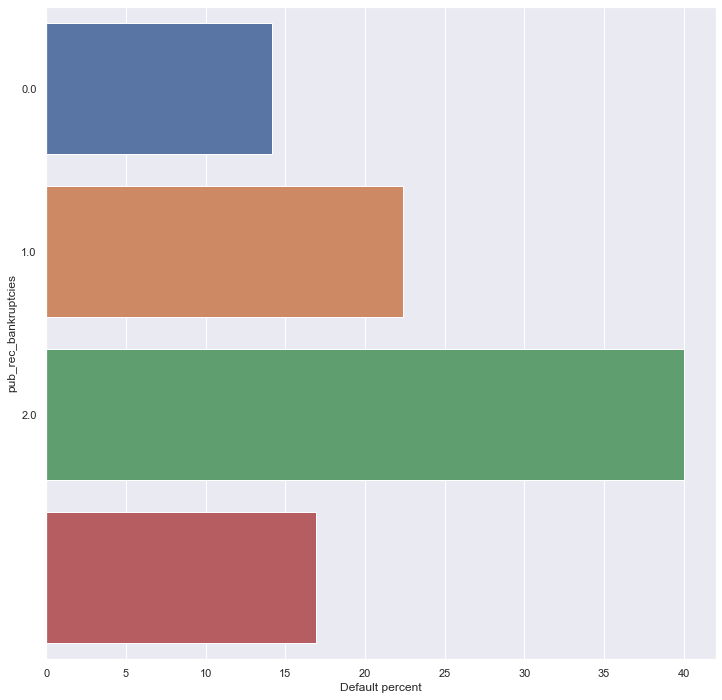

In [416]:
# Understanding the default rate for each "pub_rec_bankruptcies" in data

df_uni = df[['pub_rec_bankruptcies', 'Loan_Status_Binary']].groupby(by ='pub_rec_bankruptcies').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['pub_rec_bankruptcies'])['pub_rec_bankruptcies'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['pub_rec_bankruptcies', 'Default percent']], y = 'pub_rec_bankruptcies', x = 'Default percent')

## Univariate Analysis for Continuous Variable 

In [277]:
# Checking range of each of the continuous variables for binning
print(df['mths_since_last_delinq'].unique())
print(pd.DataFrame(df['mths_since_last_delinq'].value_counts()).reset_index().sort_values( by ='index' ))
print(df['mths_since_last_delinq'].min())
print(df['mths_since_last_delinq'].max())

[ 34.  35.  61.   8.  20.  18.  45.  38.  48.  41.  40.  74.  25.  53.
  39.  10.  26.  77.  28.  56.  52.  24.  16.  60.  54.  23.   9.  11.
  13.  65.  19.  22.  59.  79.  44.  57.  14.  63.  49.  15.  73.  70.
  29.  51.   5.  75.  55.   2.  30.  47.  69.   4.  43.  33.  21.  27.
  46.  81.  68.  78.  82.  31.  64.  76.  62.  72.  42.  50.   3.  12.
  58.  17.  71.  66.  32.   6.  80.  36.  37.   7.  67.   1.  83.  86.
 115.  96. 120. 106.  89. 103. 107.  85.  97.  95.   0.]
    index  mths_since_last_delinq
1     0.0                     443
82    1.0                      29
73    2.0                     101
48    3.0                     143
46    4.0                     147
47    5.0                     145
36    6.0                     188
39    7.0                     172
42    8.0                     165
40    9.0                     171
19   10.0                     208
43   11.0                     159
31   12.0                     191
41   13.0                     165
35   14

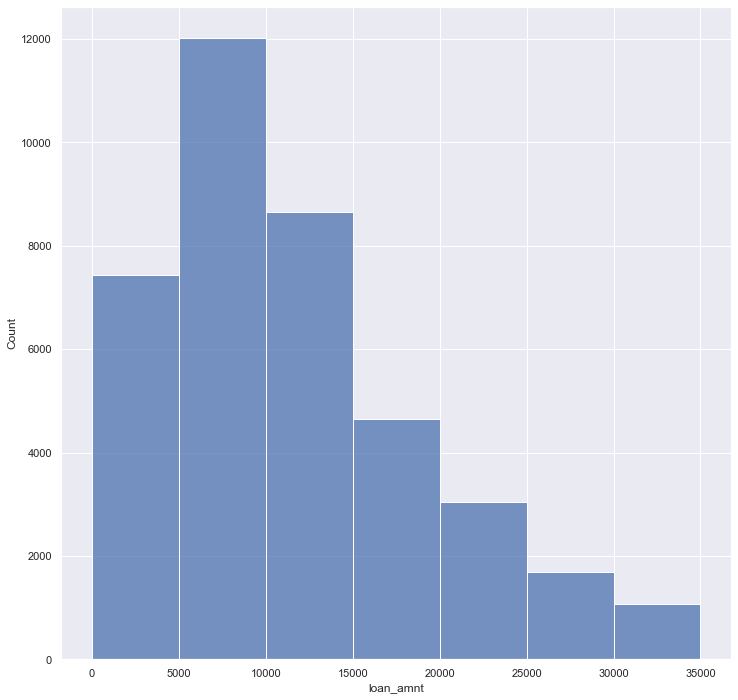

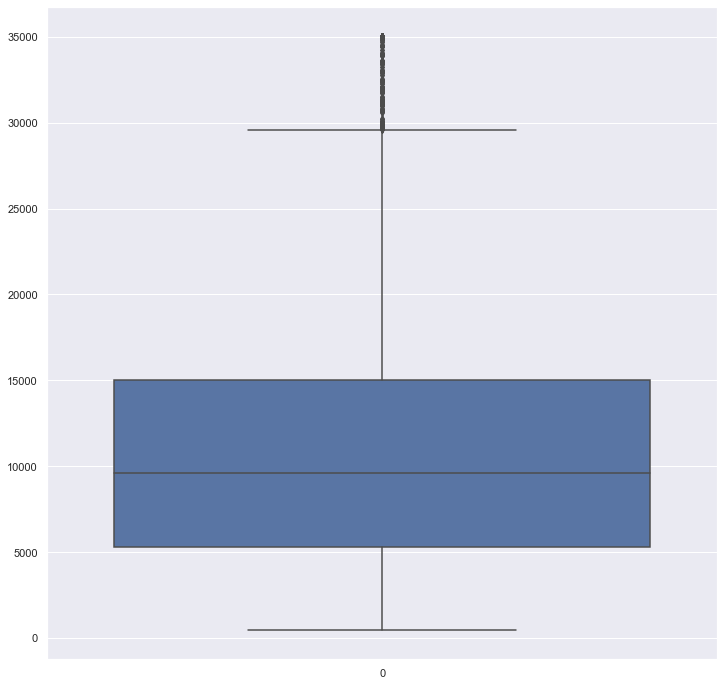

In [278]:
# Understanding distribution of  loan_amount in data and the ouliers

sns.histplot(data = df["loan_amnt"], bins=[0,5000,10000,15000,20000,25000,30000,35000] )
plt.show()
sns.boxplot(data = df["loan_amnt"])
plt.show()

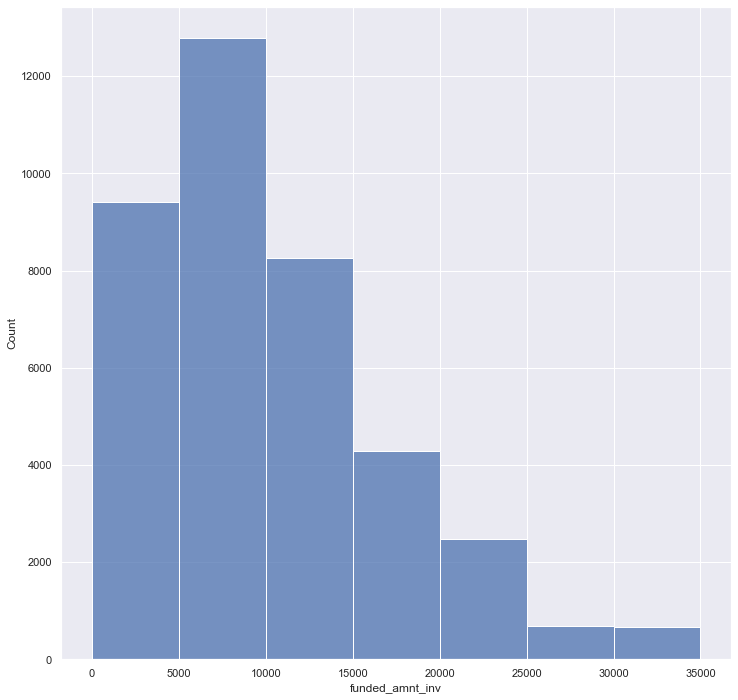

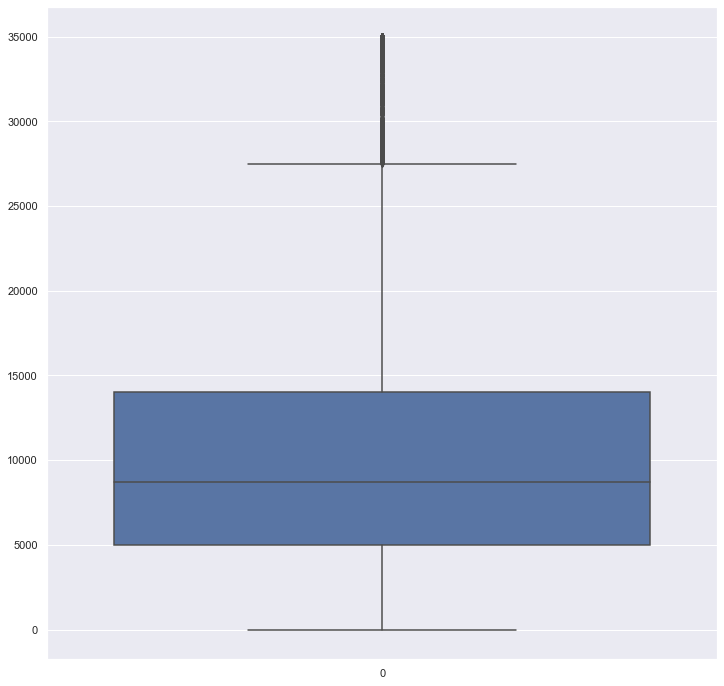

In [279]:
# Understanding distribution of  funded_amnt_inv in data and the ouliers

sns.histplot(df["funded_amnt_inv"], bins=[0,5000,10000,15000,20000,25000,30000,35000] )
plt.show()
sns.boxplot(data = df["funded_amnt_inv"])
plt.show()



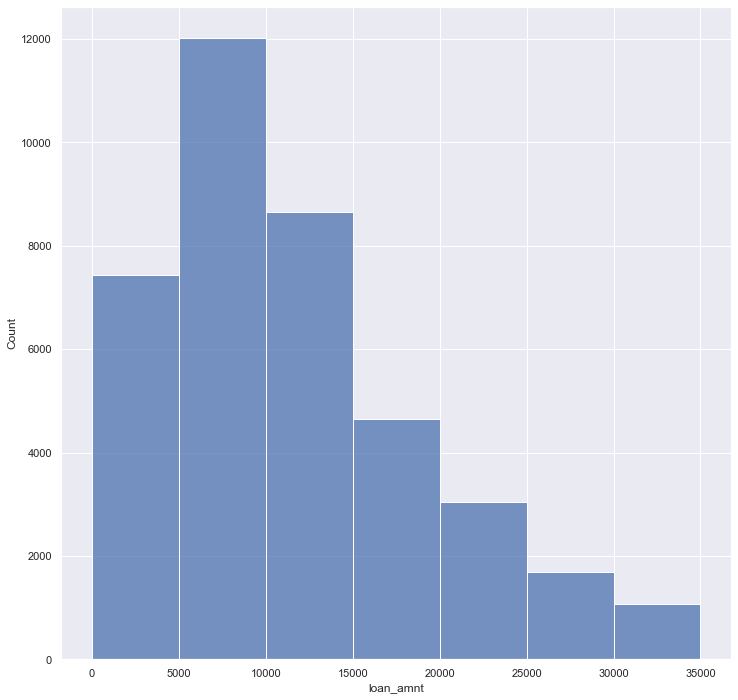

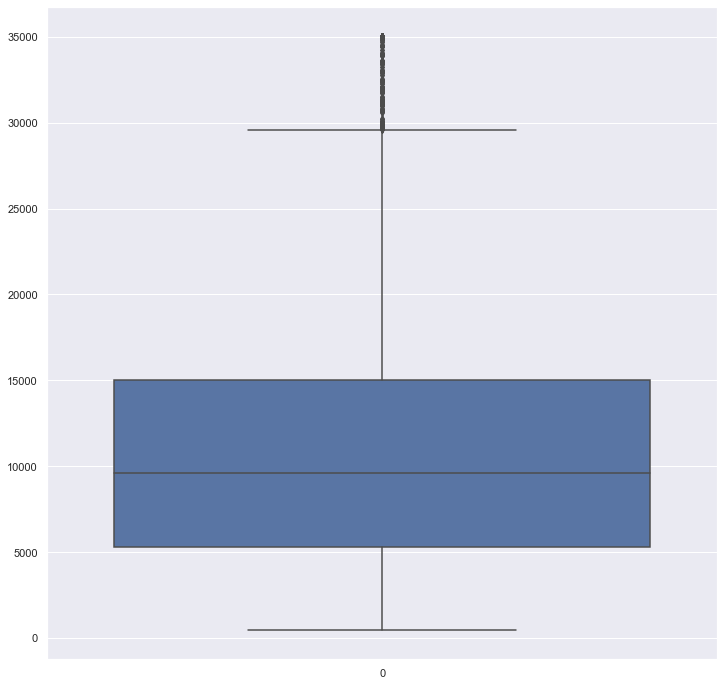

In [280]:
# Understanding distribution of  loan_amount in data and the ouliers

sns.histplot(df["loan_amnt"], bins=[0,5000,10000,15000,20000,25000,30000,35000] )
plt.show()
sns.boxplot(data = df["loan_amnt"])
plt.show()

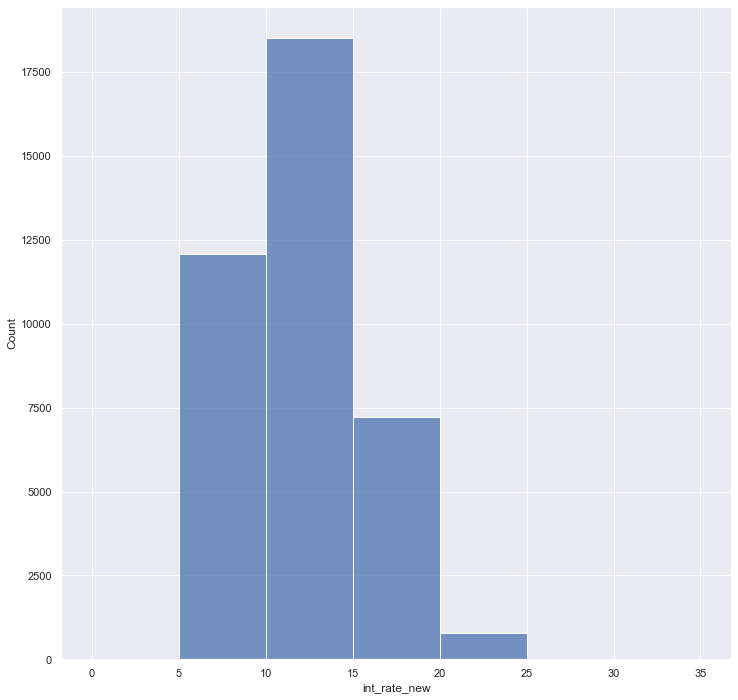

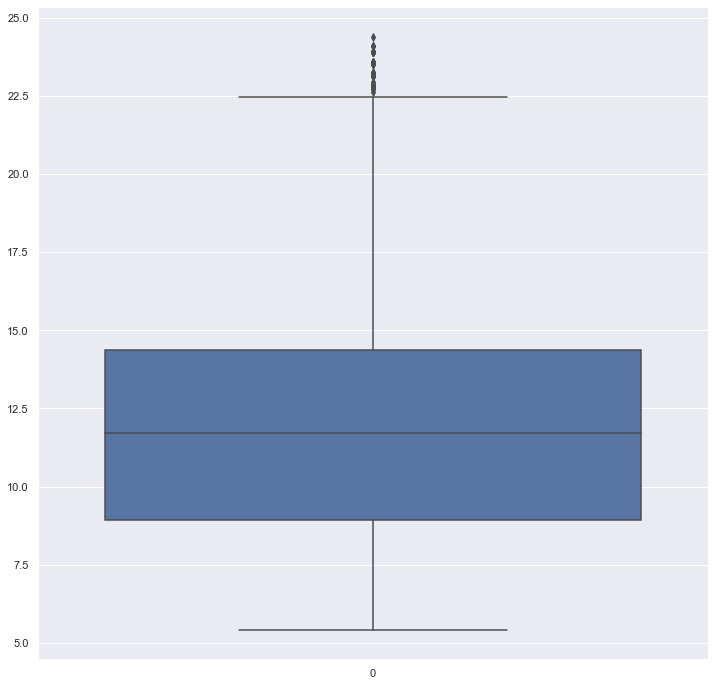

In [281]:
# Removing "%" from int_rate and converting it to float
df['int_rate_new'] = df['int_rate'].str[:-1].astype(float)
# Understanding distribution of  int_rate in data and the ouliers
sns.histplot(df["int_rate_new"], bins=[0,5,10,15,20,25, 30,35] )
plt.show()
sns.boxplot(data = df["int_rate_new"])
plt.show()



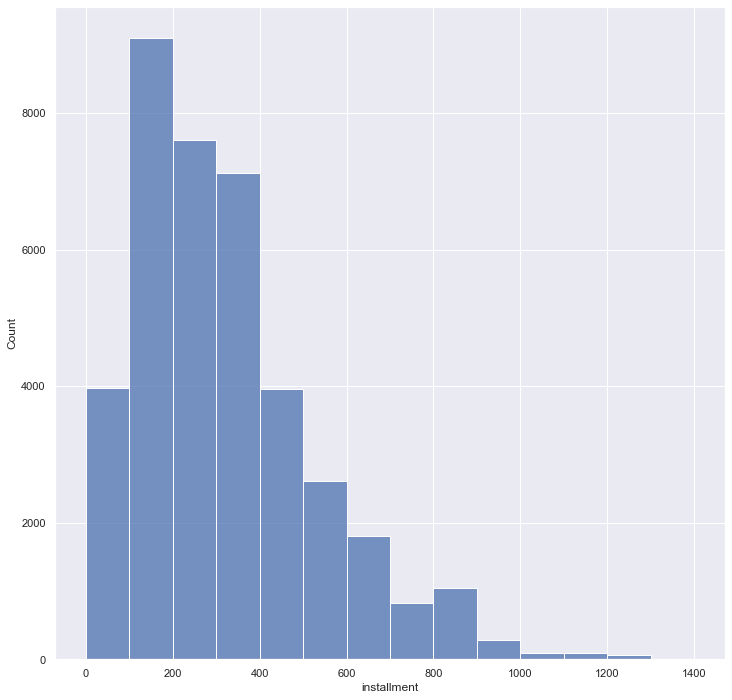

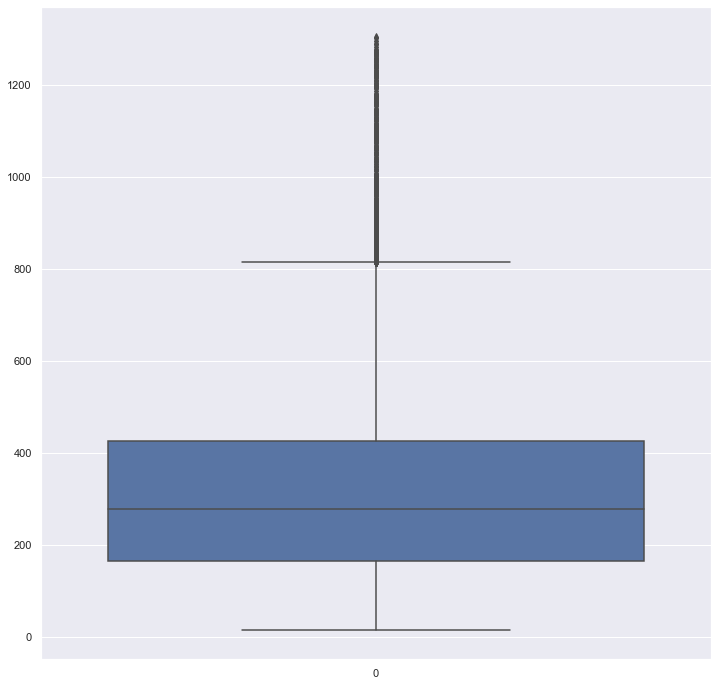

In [282]:
# Understanding distribution of installment in data and the ouliers

sns.histplot(df["installment"], bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400] )
plt.show()
sns.boxplot(data = df["installment"])
plt.show()

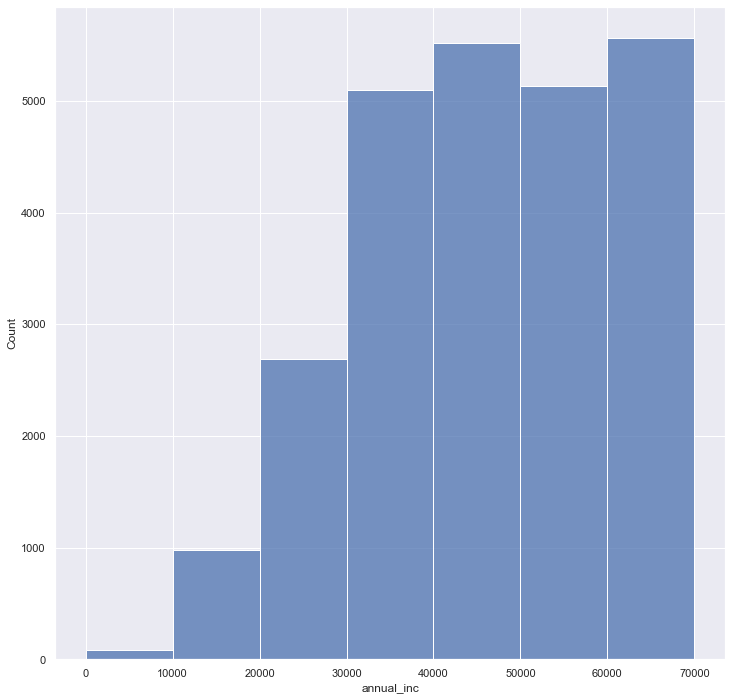

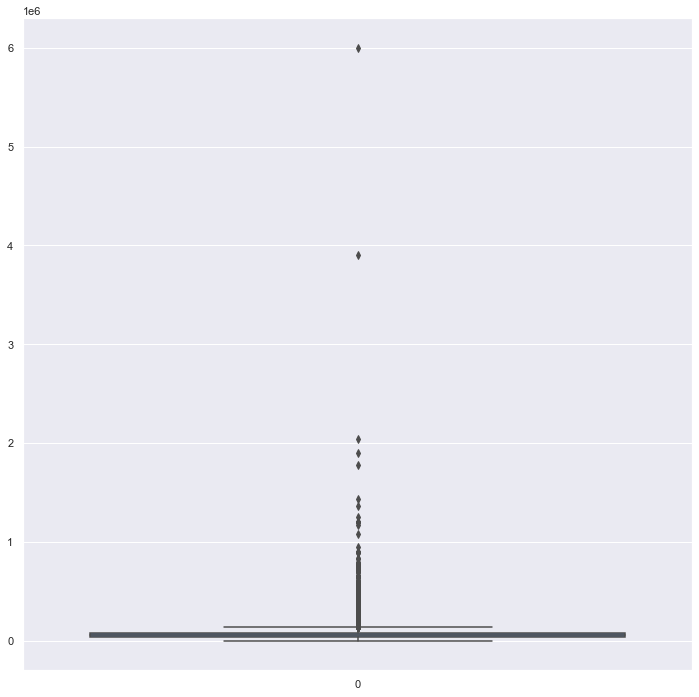

In [283]:
# Understanding distribution of  annual_inc in data and the ouliers

sns.histplot(df["annual_inc"], bins=[0,10000,20000,30000,40000,50000,60000,70000] )
plt.show()
sns.boxplot(data = df["annual_inc"])
plt.show()

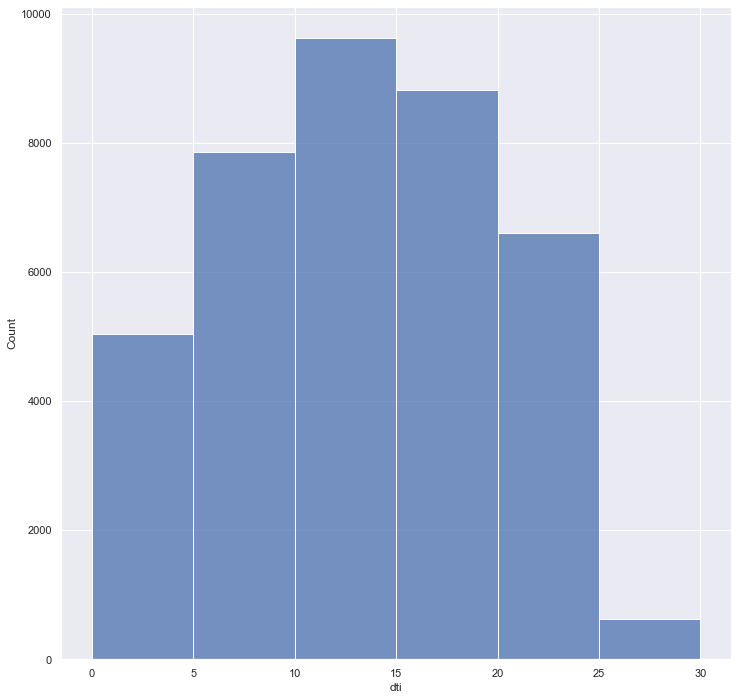

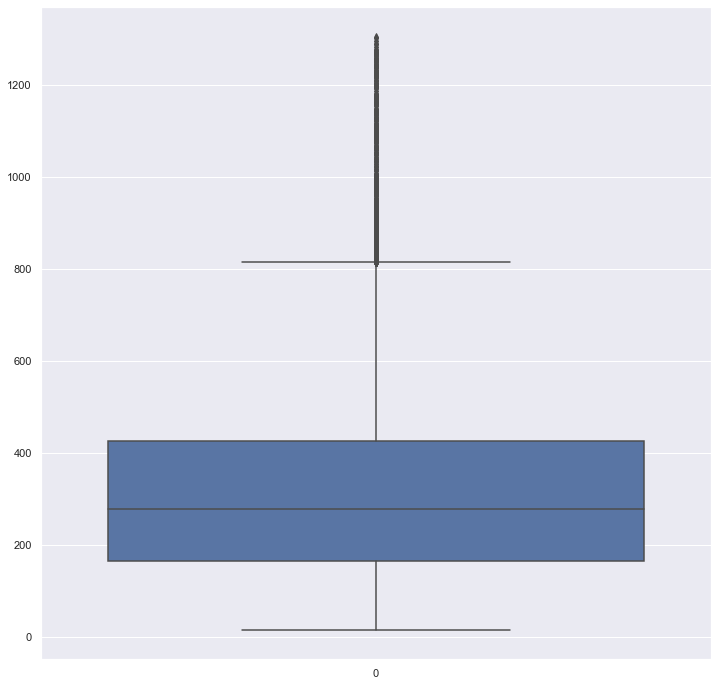

In [284]:
# Understanding distribution of  dti in data and the ouliers

sns.histplot(df["dti"], bins=[0,5,10,15,20,25,30] )
plt.show()
sns.boxplot(data = df["installment"])
plt.show()

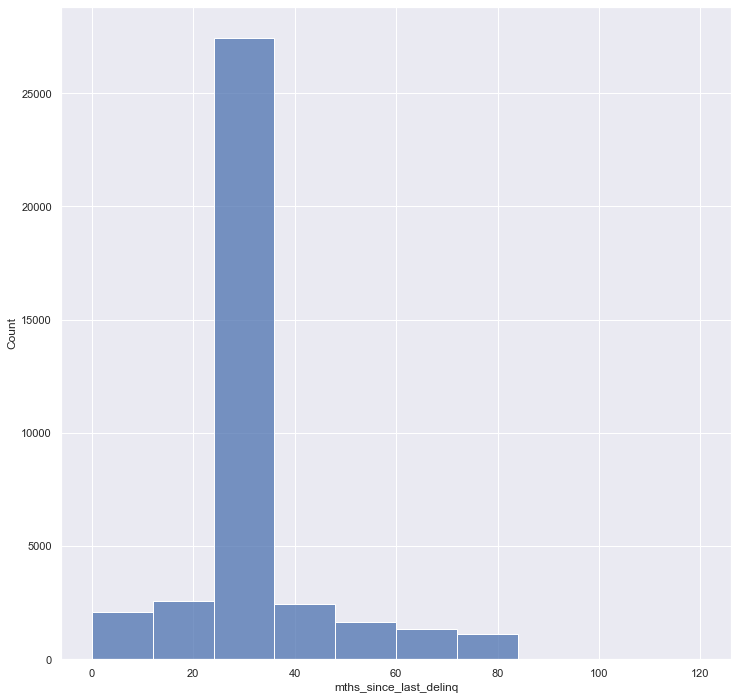

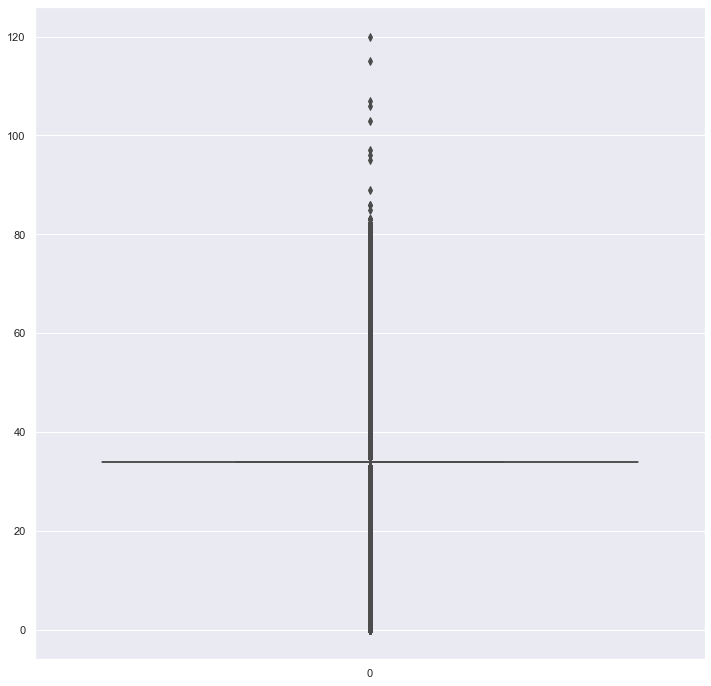

In [285]:
# Understanding distribution of  installment in data and the ouliers

sns.histplot(df["mths_since_last_delinq"], bins=[0,12,24,36,48,60,72,84,96,108,120] )
plt.show()
sns.boxplot(data = df["mths_since_last_delinq"])
plt.show()

## Univariate Analysis for Binned Continuous Variable 

In [304]:
# Creating bins for continuous varibales based on minimum value, maximum value and #unique values

df['loan_amnt_udated'] = pd.cut( x = df['loan_amnt'], bins = [0,5000,10000,15000,20000,25000,30000,35000], labels=["<$5K","$5K-$10K","$10K-$15K","$15K-$20K","$20K-$25K","$25K-$30K","$30K-$35K"])
df['funded_amnt_udated'] = pd.cut( x = df['funded_amnt'], bins = [0,5000,10000,15000,20000,25000,30000,35000], labels=["<$5K","$5K-$10K","$10K-$15K","$15K-$20K","$20K-$25K","$25K-$30K","$30K-$35K"])
df['funded_amnt_inv_udated'] = pd.cut( x = df['funded_amnt_inv'], bins = [0,5000,10000,15000,20000,25000,30000,35000], labels=["<$5K","$5K-$10K","$10K-$15K","$15K-$20K","$20K-$25K","$25K-$30K","$30K-$35K"])
df['funded_amnt_inv_udated'] = pd.cut( x = df['funded_amnt_inv'], bins = [0,5000,10000,15000,20000,25000,30000,35000], labels=["<$5K","$5K-$10K","$10K-$15K","$15K-$20K","$20K-$25K","$25K-$30K","$30K-$35K"])
df['installment_udated'] = pd.cut( x = df['installment'], bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400], labels=["<$100","$100-$200","$200-$300","$300-$400","$400-$500","$500-$600","$600-$700","$700-$800","$800-$900","$900-$1000","$1000-$1100","$1100-$1200","$1200-$1300","$1300-$1400"])
df['annual_inc_udated'] = pd.cut( x = df['annual_inc'], bins = [0,10000,20000,30000,40000,50000,60000,70000], labels=["<$10K","$10K-$20K","$20K-$30K","$30K-$40K","$40K-$50K","$50K-$60K","$60K-$70K"])
df['dti_udated'] = pd.cut( x = df['dti'], bins = [0,5,10,15,20,25,30], labels=["<5","5-10","10-20","20-25","25-30","30-35"])
df['mths_since_last_delinq_updated'] = pd.cut( x = df['mths_since_last_delinq'], bins = [0,12,24,36,48,60,72,84,96,108,120], labels=["<12","12-24","24-36","36-48","48-60","60-72","72-84","84-96","96-108","108-120"])
df['int_rate_new_updated'] = pd.cut( x = df['int_rate_new'], bins = [0,5,10,15,20,25,30], labels=["<5","05-10","10-15","15-20","20-25","25-30"])



In [305]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies,Loan_Status_Binary,Issue_mth,Issue_yr,int_rate_new,loan_amnt_udated,funded_amnt_udated,funded_amnt_inv_udated,installment_udated,annual_inc_udated,dti_udated,mths_since_last_delinq_updated,int_rate_new_updated
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,34.0,0.0,0,Dec,11,10.65,<$5K,<$5K,<$5K,$100-$200,$20K-$30K,30-35,24-36,10-15
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,34.0,0.0,1,Dec,11,15.27,<$5K,<$5K,<$5K,<$100,$20K-$30K,<5,24-36,15-20
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,34.0,0.0,0,Dec,11,15.96,<$5K,<$5K,<$5K,<$100,$10K-$20K,5-10,24-36,15-20
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,35.0,0.0,0,Dec,11,13.49,$5K-$10K,$5K-$10K,$5K-$10K,$300-$400,$40K-$50K,20-25,24-36,10-15
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,34.0,0.0,0,Dec,11,7.90,<$5K,<$5K,<$5K,$100-$200,$30K-$40K,10-20,24-36,05-10


<AxesSubplot:xlabel='Default percent', ylabel='loan_amnt_udated'>

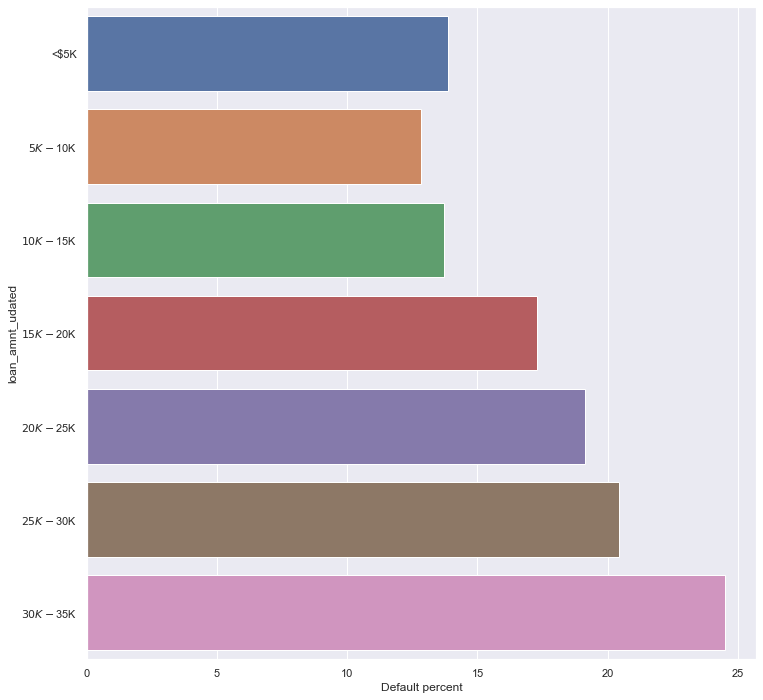

In [420]:
# Understanding the default rate for each "loan_amnt" in data

df_uni = df[['loan_amnt_udated', 'Loan_Status_Binary']].groupby(by ='loan_amnt_udated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['loan_amnt_udated'])['loan_amnt_udated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['loan_amnt_udated', 'Default percent']], y = 'loan_amnt_udated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='funded_amnt_udated'>

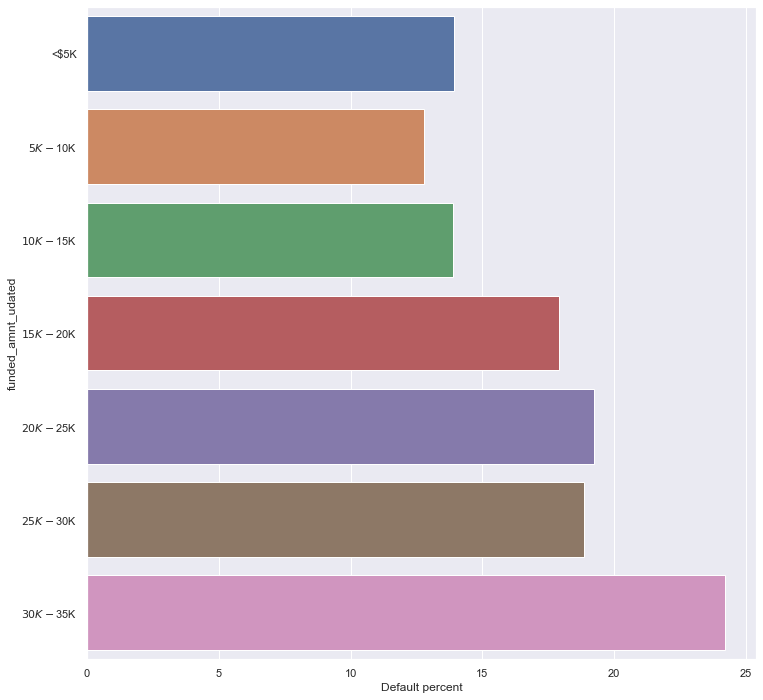

In [421]:
# Understanding the default rate for each "funded_amnt" in data

df_uni = df[['funded_amnt_udated', 'Loan_Status_Binary']].groupby(by ='funded_amnt_udated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['funded_amnt_udated'])['funded_amnt_udated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['funded_amnt_udated', 'Default percent']], y = 'funded_amnt_udated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='funded_amnt_inv_udated'>

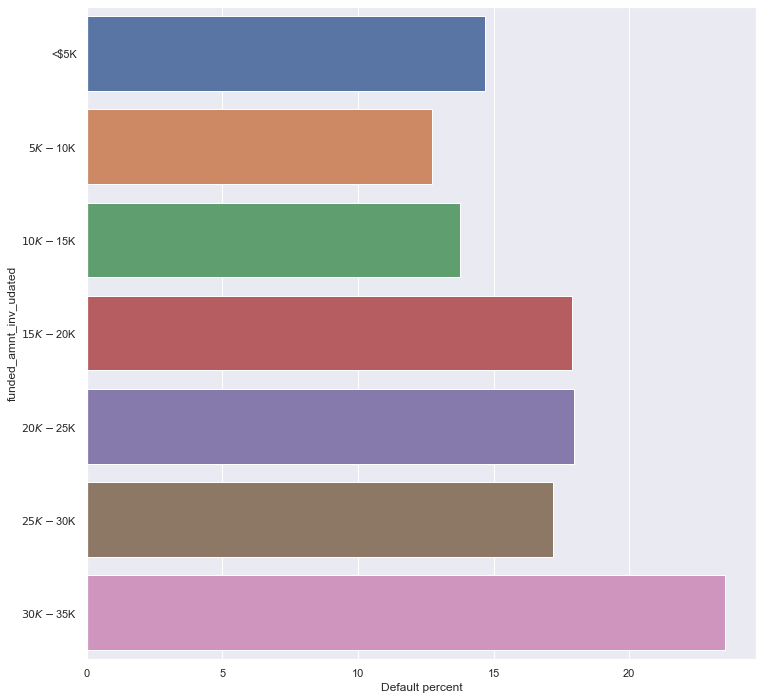

In [422]:
# Understanding the default rate for each "funded_amnt_inv" in data

df_uni = df[['funded_amnt_inv_udated', 'Loan_Status_Binary']].groupby(by ='funded_amnt_inv_udated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['funded_amnt_inv_udated'])['funded_amnt_inv_udated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['funded_amnt_inv_udated', 'Default percent']], y = 'funded_amnt_inv_udated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='installment_udated'>

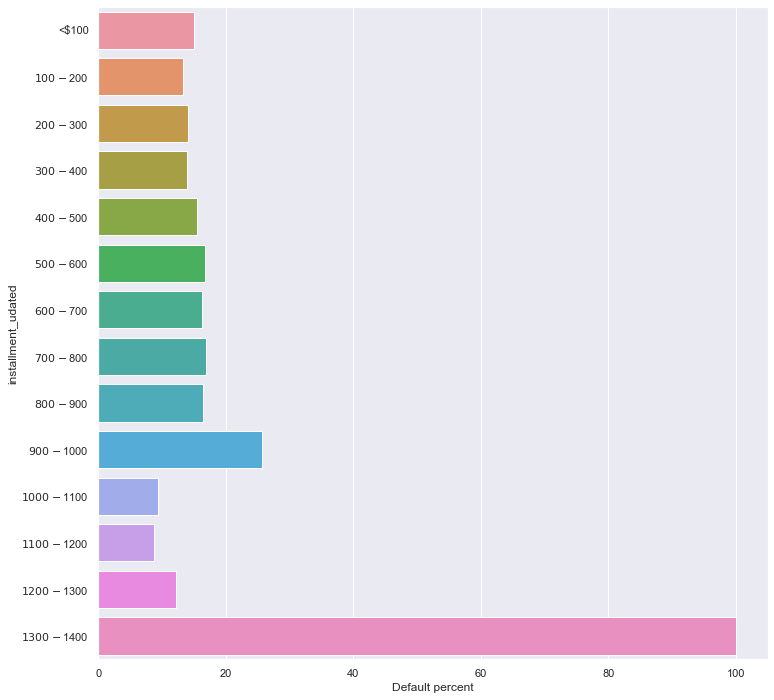

In [423]:
# Understanding the default rate for each "installment" in data

df_uni = df[['installment_udated', 'Loan_Status_Binary']].groupby(by ='installment_udated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['installment_udated'])['installment_udated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['installment_udated', 'Default percent']], y = 'installment_udated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='annual_inc_udated'>

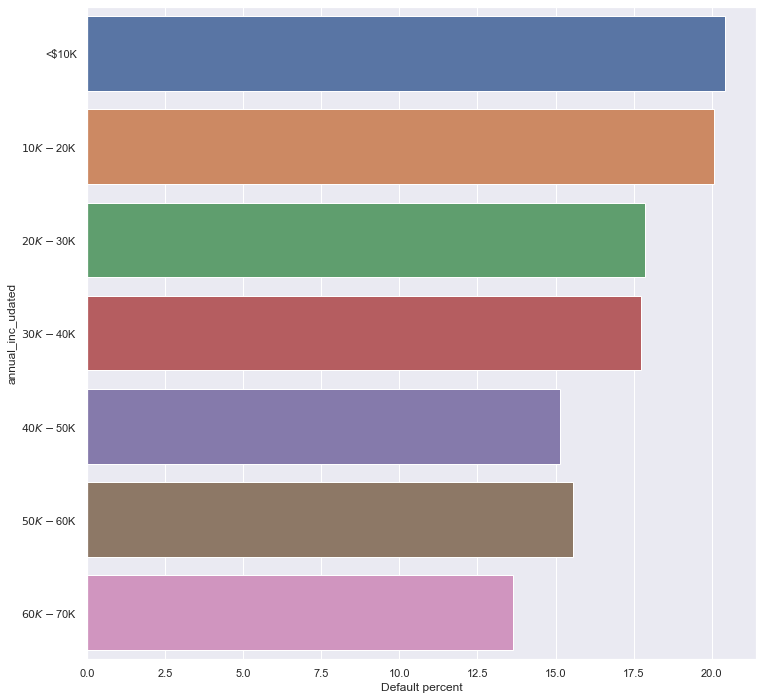

In [424]:
# Understanding the default rate for each "annual_inc" in data

df_uni = df[['annual_inc_udated', 'Loan_Status_Binary']].groupby(by ='annual_inc_udated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['annual_inc_udated'])['annual_inc_udated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['annual_inc_udated', 'Default percent']], y = 'annual_inc_udated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='dti_udated'>

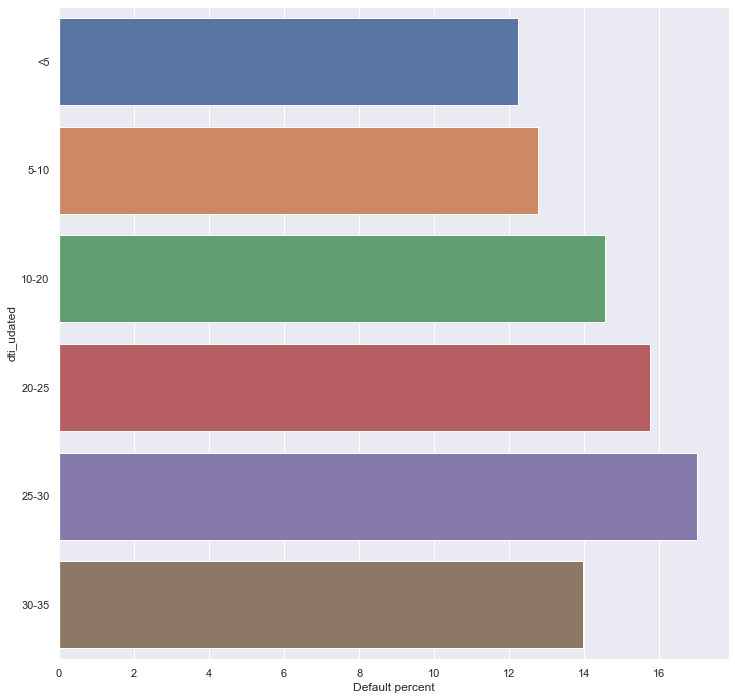

In [426]:
# Understanding the default rate for each "dti" in data

df_uni = df[['dti_udated', 'Loan_Status_Binary']].groupby(by ='dti_udated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['dti_udated'])['dti_udated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['dti_udated', 'Default percent']], y = 'dti_udated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='mths_since_last_delinq_updated'>

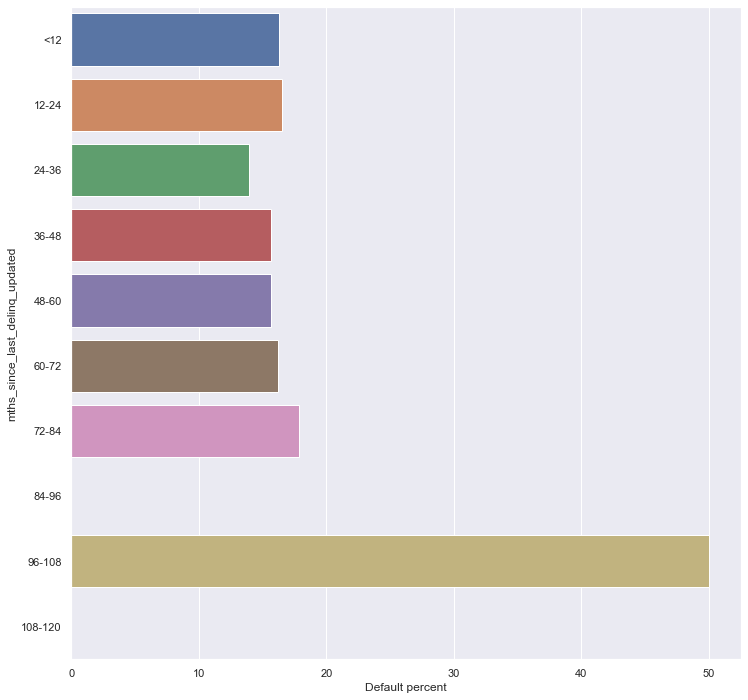

In [427]:
# Understanding the default rate for each "mths_since_last_delinq" in data

df_uni = df[['mths_since_last_delinq_updated', 'Loan_Status_Binary']].groupby(by ='mths_since_last_delinq_updated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['mths_since_last_delinq_updated'])['mths_since_last_delinq_updated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['mths_since_last_delinq_updated', 'Default percent']], y = 'mths_since_last_delinq_updated', x = 'Default percent')

<AxesSubplot:xlabel='Default percent', ylabel='int_rate_new_updated'>

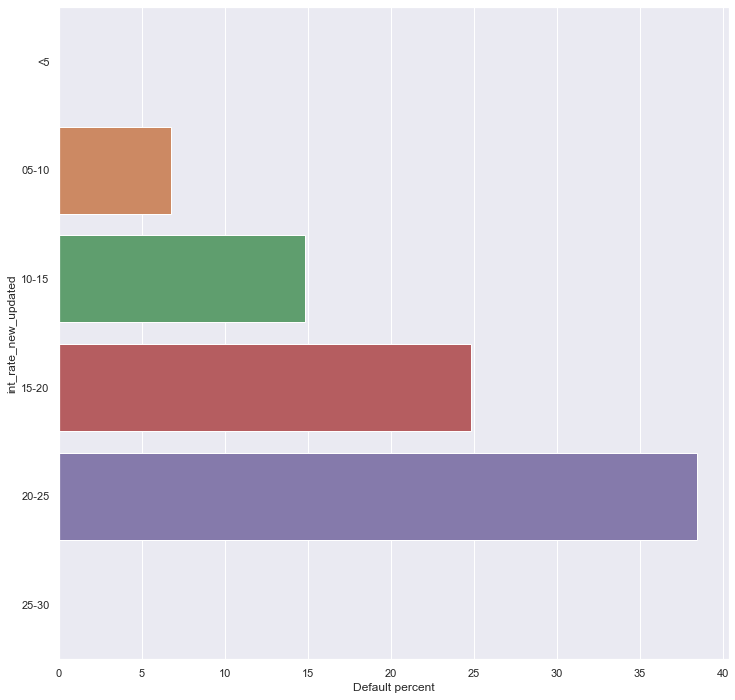

In [428]:
# Understanding the default rate for each "int_rate_new" in data

df_uni = df[['int_rate_new_updated', 'Loan_Status_Binary']].groupby(by ='int_rate_new_updated').sum()
df_uni['Default percent'] = (df_uni['Loan_Status_Binary']/df.groupby(['int_rate_new_updated'])['int_rate_new_updated'].count()*100)
df_uni = df_uni.reset_index()
df_uni
sns.barplot(data = df_uni[['int_rate_new_updated', 'Default percent']], y = 'int_rate_new_updated', x = 'Default percent')

# Bivariat analysis

<AxesSubplot:xlabel='int_rate_new_updated', ylabel='Default percent'>

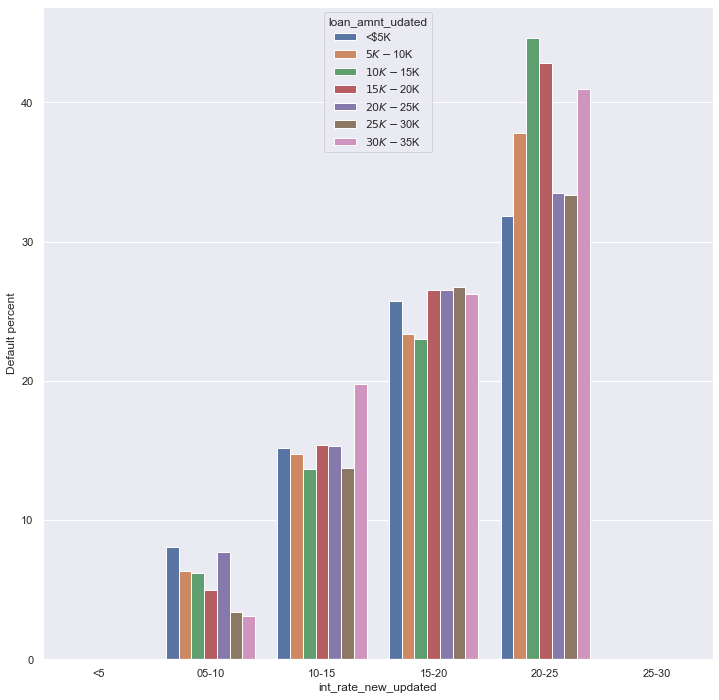

In [457]:
df_bi = df[['loan_amnt_udated','int_rate_new_updated', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','int_rate_new_updated']).sum()
df_bi['Total count'] = df[['loan_amnt_udated','int_rate_new_updated', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','int_rate_new_updated']).count()
df_bi['Default percent'] = (df_bi['Loan_Status_Binary']/df_bi['Total count']*100)
df_bi = df_bi.reset_index()
df_bi['Default percent'].fillna(0)
sns.barplot(data = df_bi[['loan_amnt_udated', 'int_rate_new_updated','Default percent']], x = 'int_rate_new_updated', y = 'Default percent', hue = 'loan_amnt_udated')

<AxesSubplot:xlabel='term', ylabel='Default percent'>

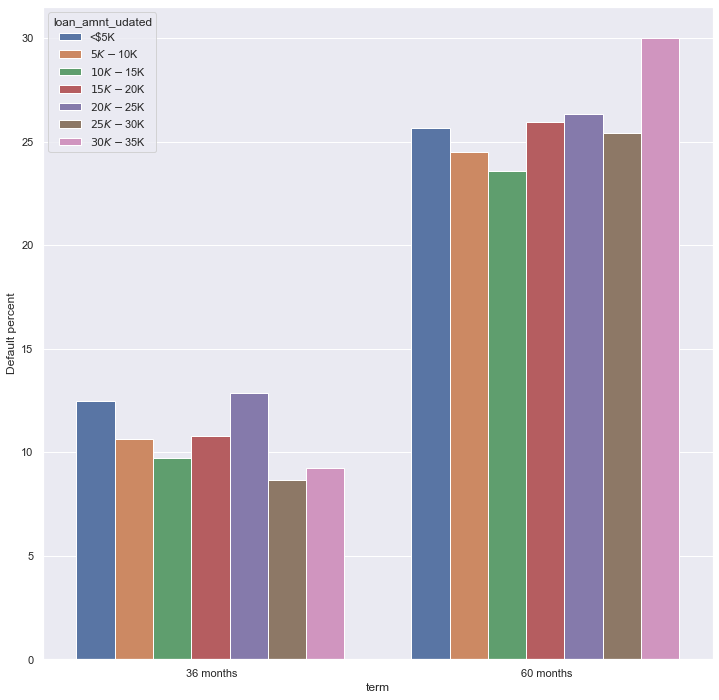

In [476]:
df_bi = df[['loan_amnt_udated','term', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','term']).sum()
df_bi['Total count'] = df[['loan_amnt_udated','term', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','term']).count()
df_bi['Default percent'] = (df_bi['Loan_Status_Binary']/df_bi['Total count']*100)
df_bi = df_bi.reset_index()
df_bi['Default percent'].fillna(0)
sns.barplot(data = df_bi[['loan_amnt_udated', 'term','Default percent']], x = 'term', y = 'Default percent', hue = 'loan_amnt_udated')

<AxesSubplot:xlabel='installment_udated', ylabel='Default percent'>

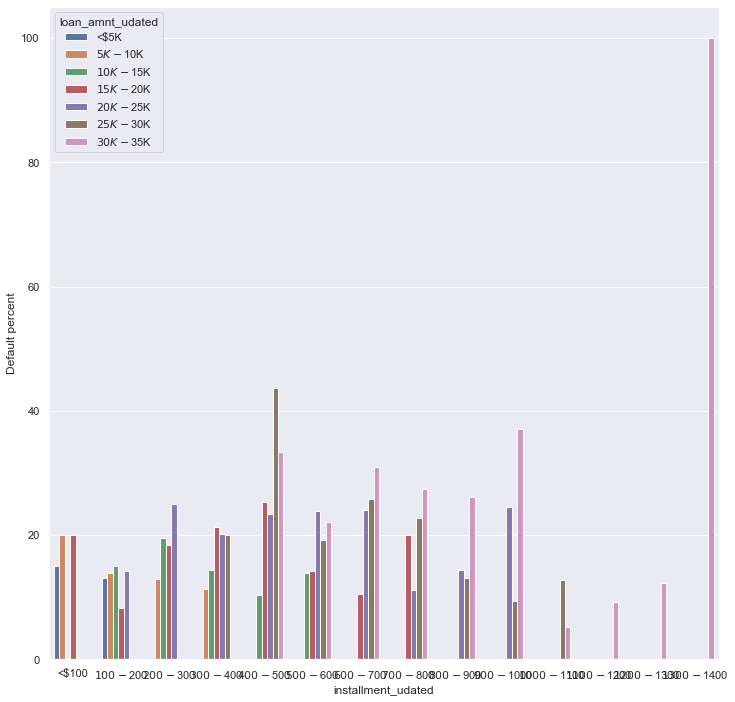

In [477]:
df_bi = df[['loan_amnt_udated','installment_udated', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','installment_udated']).sum()
df_bi['Total count'] = df[['loan_amnt_udated','installment_udated', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','installment_udated']).count()
df_bi['Default percent'] = (df_bi['Loan_Status_Binary']/df_bi['Total count']*100)
df_bi = df_bi.reset_index()
df_bi['Default percent'].fillna(0)
sns.barplot(data = df_bi[['loan_amnt_udated', 'installment_udated','Default percent']], x = 'installment_udated', y = 'Default percent', hue = 'loan_amnt_udated')

In [474]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies,Loan_Status_Binary,Issue_mth,Issue_yr,int_rate_new,loan_amnt_udated,funded_amnt_udated,funded_amnt_inv_udated,installment_udated,annual_inc_udated,dti_udated,mths_since_last_delinq_updated,int_rate_new_updated
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,34.0,0.0,0,Dec,11,10.65,<$5K,<$5K,<$5K,$100-$200,$20K-$30K,30-35,24-36,10-15
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,34.0,0.0,1,Dec,11,15.27,<$5K,<$5K,<$5K,<$100,$20K-$30K,<5,24-36,15-20
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,34.0,0.0,0,Dec,11,15.96,<$5K,<$5K,<$5K,<$100,$10K-$20K,5-10,24-36,15-20
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,35.0,0.0,0,Dec,11,13.49,$5K-$10K,$5K-$10K,$5K-$10K,$300-$400,$40K-$50K,20-25,24-36,10-15
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,34.0,0.0,0,Dec,11,7.90,<$5K,<$5K,<$5K,$100-$200,$30K-$40K,10-20,24-36,05-10


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Default percent'>

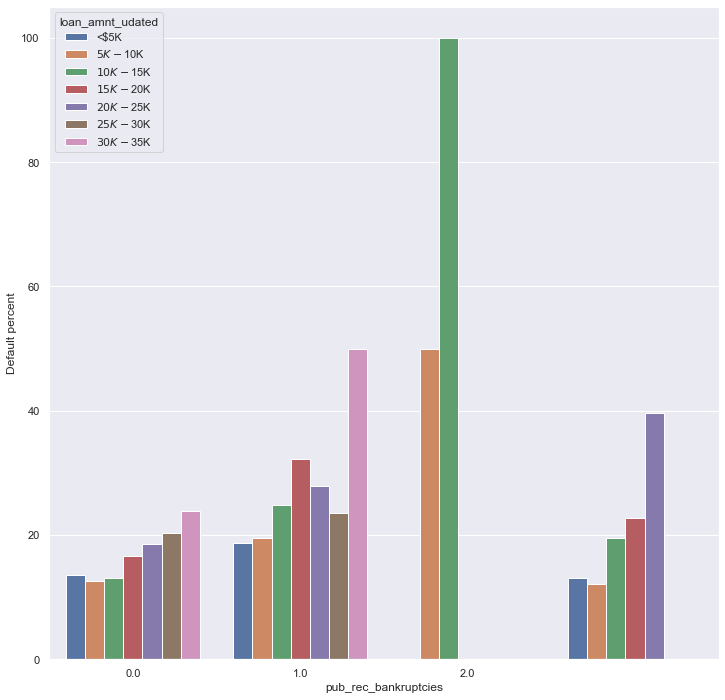

In [478]:
df_bi = df[['loan_amnt_udated','pub_rec_bankruptcies', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','pub_rec_bankruptcies']).sum()
df_bi['Total count'] = df[['loan_amnt_udated','pub_rec_bankruptcies', 'Loan_Status_Binary']].groupby(by =['loan_amnt_udated','pub_rec_bankruptcies']).count()
df_bi['Default percent'] = (df_bi['Loan_Status_Binary']/df_bi['Total count']*100)
df_bi = df_bi.reset_index()
df_bi['Default percent'].fillna(0)
sns.barplot(data = df_bi[['loan_amnt_udated', 'pub_rec_bankruptcies','Default percent']], x = 'pub_rec_bankruptcies', y = 'Default percent', hue = 'loan_amnt_udated')

## Insights


## Key drivers of high default rates are
    # Term - 60 month loans have higer chances of getting default
    # State of the borrower - Borrower from Nebraska have higer default rate than rest of the nation
    # #Public Bankruptcies  - Borrowers having 2 bankrupcies are more likely to default on loan
    # Loan Amounnt - Higer the loan amount greater are the chances of default
    # Interest Rate - Higer rate of intrest lead to higher chances of bankrupcies
    # Installment Amount - Borrowers with installment amount between $1300 and $1400 have highest chances of defaulting